# Fixed Point Iteration

In [6]:
import numpy as np
from math import sin

%matplotlib notebook

In [7]:
eps = 1e-5

<IPython.core.display.Javascript object>


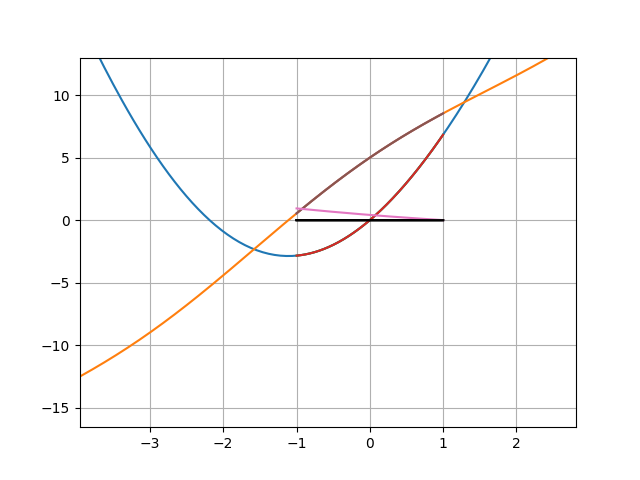

In [8]:
import matplotlib.pyplot as plt

x = np.linspace(-20,20,1000)

plt.plot(x, np.sin(x) + 2*x*x + 4*x)
plt.grid(True)
plt.show()


In [9]:
plt.plot(x, np.cos(x) + 4*x + 4)
plt.grid(True)
plt.show()

In [10]:
def f(x):
    return np.sin(x) + 2*x*x +4*x 

def df(x):
    return np.cos(x) + 4*x + 4

def p1(x, a):
    return x-a*f(x)

def d_p1(x, a):
    return 1-a*df(x)

def p2(x, x0):
    return x-f(x)/df(x0)

def d_p2(x, x0):
    return 1-df(x)/df(x0)

In [11]:
def simple_first(x0, p1, eps, q, a):
    k = 0
    xn_1 = x0
    xn = p1(xn_1, a)
    
    while abs(xn - xn_1) >= ((1-q)/q)*eps:
        xn_1 = xn
        xn = p1(xn_1, a)
        k += 1
    return xn, k

In [12]:
def simple_second(x0, p2, eps, q):
    k = 0
    xn_1 = x0
    xn = p2(xn_1, x0)
    
    while abs(xn - xn_1) >= ((1-q)/q)*eps:
        xn_1 = xn
        xn = p2(xn_1, x0)
        k += 1
    return xn, k

In [14]:
x = np.arange(-0.999, 0.999, 0.001)
y = f(x)
plt.plot(x, y)
plt.plot(x, x*0, 'k')
plt.grid(True)
plt.show()


На основе графика выделим следующий отрезок локализации: Проверим поведение производной функции на отрезке локализации [-1.0, 1.0]

In [16]:
x1 = np.arange(-1, 1, 0.001)
y1 = df(x1)
plt.plot(x1, y1)
plt.plot(x1, x1*0, 'k')
plt.grid(True)
plt.show()

Производная отрицательна на нужном куске отрезка, значит, значения m1 и M1 будут отрицательны. По этому для нахождения alpha1 возьмем значеения m1 M1 с минусами. Это не повлияет на нахождение корня

In [17]:
m1 = -df(-1.0)
M1 = -df(1.0)
a1 = 1/(m1 + M1)
q1 = (M1 - m1)/(M1 + m1)
m1, M1, a1, q1

(-0.54030230586813977,
 -8.5403023058681402,
 -0.11012482568699712,
 0.88099860549597697)

In [18]:
print('x = %.5f, количество итераций = %d' % simple_first(1, p1, eps, q1, -a1))

x = 0.00000, количество итераций = 16


In [19]:
x3 = np.arange(-1, 1, 0.001)
y3 = d_p2(x3, 1)
plt.plot(x3, y3)
plt.plot(x3, x3*0, 'k')
plt.grid(True)
plt.show()


In [20]:
q3 = np.amax(abs(y3))
q3

0.93673499057558041

0.93673499057558041 < 1 значит сходимость доказана

# Метод Ньютона

In [107]:
def f(x):
    return 3*x**3 - 77*x*x + 605*x - 1331

def df(x):
    return 9*x*x - 154*x + 605

In [116]:
def approx_root1(loc):
    a, b = loc[0], loc[1]
    middle = (a + b) / 2
    while np.abs(f(middle)) > 10**(-1):
        a, b = [a, middle] if f(a)*f(middle) < 0 else [middle, b]
        middle = (a + b) / 2
    return middle

def approx_root(loc):
    a, b = loc[0], loc[1]
    middle = (a + b) / 2

    a, b = [a, middle] if f(a)*f(middle) < 0 else [middle, b]
       
    return middle

<IPython.core.display.Javascript object>


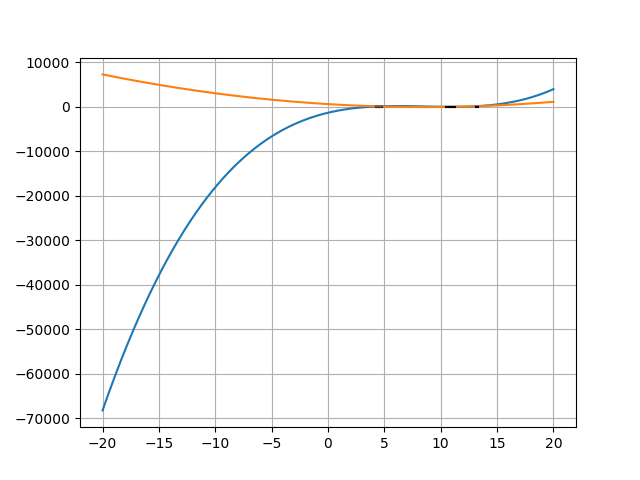

In [25]:
x = np.linspace(-20,20,1000)

plt.plot(x, f(x))
plt.grid(True)
plt.show()

По графику видно только 2 корня, потому что второй имеет кратность 2. 

In [32]:
plt.plot(x, df(x))
plt.grid(True)
plt.show()

Отрезки локализации [4.25; 4.75], [10.5;11.25], [13.1;13.3]

In [27]:
# для 1 корня
x = np.arange(4.25, 4.75, 0.001)
y = f(x)
plt.plot(x, y)
plt.plot(x, x*0, 'k')
plt.grid(True)
plt.show()

In [28]:
# для 2 корня
x1 = np.arange(10.5, 11.25, 0.001)
y = f(x1)
plt.plot(x1, y)
plt.plot(x1, x1*0, 'k')
plt.grid(True)
plt.show()

In [29]:
# для 3 корня
x2 = np.arange(13.1, 13.3, 0.001)
y = f(x2)
plt.plot(x2, y)
plt.plot(x2, x2*0, 'k')
plt.grid(True)
plt.show()

In [128]:
eps = 1e-7

def newt(x, x0, max_iter):
    xn = x0
    for n in range(0, max_iter):
        fxn = f(xn)
        if abs(f(xn)) < eps:
            print('Found solution after', n,'iterations.')
            return xn
        Dfxn = df(xn)
        if Dfxn == 0:
            print('Zero derivative. No solution found.')
            return -1
        xn = xn - fxn/Dfxn
    print('Exceeded maximum iterations. No solution found.')
    return -1

In [ ]:
def newt_multiple(x, x0, max_iter, m):
    xn = x0
    for n in range(0, max_iter):
        fxn = f(xn)
        if abs(f(xn)) < eps:
            print('Found solution after', n,'iterations.')
            return xn
        Dfxn = df(xn)
        if Dfxn == 0:
            print('Zero derivative. No solution found.')
            return -1
        xn = xn - m*fxn/Dfxn
    print('Exceeded maximum iterations. No solution found.')
    return -1

Корни найденные обычным методом Ньютона, путнкт А

In [70]:
r1 = newt(x, 4, 100)
print(r1)
r2 = newt(x1, 10, 100)
print(r2)
r3 = newt(x2, 13, 100)
print(r3)

Found solution after 4 iterations.
3.666666666666669
Found solution after 14 iterations.
10.999947753678843
Found solution after 16 iterations.
11.00003826569298


Заметим, что метод сошелся быстрее всего на корне кратности 1

In [131]:
# localization areas [4.25; 4.75], [10.5;11.25], [13.1;13.3]

m = [1, 2, 3]
areas = [(4.0, 4.7), (10.5,  11.2), (13, 13.5)]
approx_roots = list(map(approx_root, areas)) 

for root, area in zip(approx_roots, areas):
    print(root, ' in ', area, '\n')
    for _ in m:
        print('mult is ', _)
        r = newt_multiple(area, root, 100, _)
        print("Root {}  Mult  {} \n".format(r, _))
    print('---------------------')


4.35  in  (4.0, 4.7) 

mult is  1
Found solution after 4 iterations.
Root 3.6666666665862975  Mult  1 

mult is  2
Exceeded maximum iterations. No solution found.
Root None  Mult  2 

mult is  3
Found solution after 21 iterations.
Root 11.000034030266105  Mult  3 

---------------------
10.85  in  (10.5, 11.2) 

mult is  1
Found solution after 12 iterations.
Root 10.999964132773467  Mult  1 

mult is  2
Found solution after 2 iterations.
Root 11.000000170686635  Mult  2 

mult is  3
Found solution after 12 iterations.
Root 10.999962614974613  Mult  3 

---------------------
13.25  in  (13, 13.5) 

mult is  1
Found solution after 16 iterations.
Root 11.000044068268428  Mult  1 

mult is  2
Found solution after 3 iterations.
Root 11.00000089975157  Mult  2 

mult is  3
Found solution after 15 iterations.
Root 10.999947457306185  Mult  3 

---------------------


In [126]:
%%latex
Такой метод сходится не при любых приближениях. Возьмем 
$x_{0}$ такой что $\frac{M}{2m}|x^*-x_{0}|>1, \ M = max_{x\in[1, 2]}|f''(x)|, \ m = min_{x\in[1, 2]}|f'(x)|, x_{0}\in[1, 2]$

<IPython.core.display.Latex object>